<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [2]:
df = pd.read_csv('../data/states_edu.csv')
print(len(df.index))
df.head()

1715


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [10]:
for col in df:
    print(col, df[col].unique())

PRIMARY_KEY ['1992_ALABAMA' '1992_ALASKA' '1992_ARIZONA' ... '2019_WEST_VIRGINIA'
 '2019_WISCONSIN' '2019_WYOMING']
STATE ['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT_OF_COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW_HAMPSHIRE'
 'NEW_JERSEY' 'NEW_MEXICO' 'NEW_YORK' 'NORTH_CAROLINA' 'NORTH_DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE_ISLAND' 'SOUTH_CAROLINA'
 'SOUTH_DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST_VIRGINIA' 'WISCONSIN' 'WYOMING' 'DODEA' 'NATIONAL']
YEAR [1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1986 1987 1988
 1989 1990 1991 2017 2019]
ENROLL [    nan 727716. 121156. ... 276764. 857736.  94511.]
TOTAL_REVENUE [ 267

Chosen test: **<hit `Enter` to edit>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [42]:
# use different types REVENUE and EXPENDITURE to predict GRADES_ALL_G
selected_df = df[["FEDERAL_REVENUE", "STATE_REVENUE", "LOCAL_REVENUE", "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_ALL_G"]]
selected_df = selected_df.dropna()
selected_df.head()

,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_ALL_G
51,331409.0,1729295.0,766687.0,1564558.0,794146.0,237222.0,204207.0,734288.0
52,176150.0,775829.0,239419.0,494917.0,433788.0,36291.0,135791.0,125948.0
53,318465.0,1415407.0,1694104.0,1578889.0,1000914.0,164083.0,680139.0,709453.0
54,128196.0,771079.0,447634.0,782791.0,386526.0,68617.0,97824.0,444271.0
55,2151157.0,17064146.0,8828035.0,15281147.0,8914559.0,1608514.0,1944760.0,5327231.0


Final feature list: "FEDERAL_REVENUE", "STATE_REVENUE", "LOCAL_REVENUE", "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_ALL_G"

Feature selection justification: I want to use different types REVENUE and EXPENDITURE to predict GRADES_ALL_G.

<h2> EDA </h2>

Visualization 1

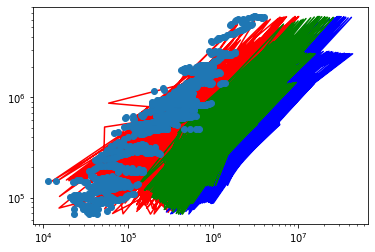

In [43]:
import matplotlib.pyplot as plt
plt.plot(selected_df.CAPITAL_OUTLAY_EXPENDITURE, selected_df.GRADES_ALL_G, "r")
plt.plot(selected_df.INSTRUCTION_EXPENDITURE, selected_df.GRADES_ALL_G, "b")
plt.plot(selected_df.SUPPORT_SERVICES_EXPENDITURE, selected_df.GRADES_ALL_G, "g")
plt.plot(selected_df.OTHER_EXPENDITURE, selected_df.GRADES_ALL_G, "o")
plt.xscale("log")
plt.yscale("log")

Expenditures are log associated with Grades_all_g

Visualization 2

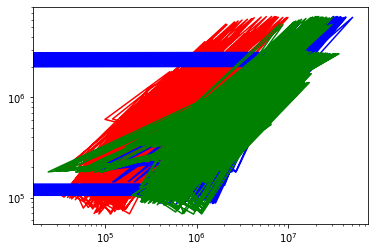

In [44]:
plt.plot(selected_df.FEDERAL_REVENUE, selected_df.GRADES_ALL_G, "r")
plt.plot(selected_df.STATE_REVENUE, selected_df.GRADES_ALL_G, "b")
plt.plot(selected_df.LOCAL_REVENUE, selected_df.GRADES_ALL_G, "g")
plt.xscale("log")
plt.yscale("log")

States revenue does not work like other two revenues

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [25]:
from sklearn.model_selection import train_test_split

In [45]:
X = selected_df[["FEDERAL_REVENUE", "STATE_REVENUE", "LOCAL_REVENUE", "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]]
y = selected_df.GRADES_ALL_G


In [46]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **REGRESSION**

In [37]:
# import your sklearn class here
from sklearn import linear_model

In [38]:
# create your model here
model = linear_model.Lasso(alpha = 0.1)

In [47]:
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40360115431848.58, tolerance: 88347236627.22707
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [48]:
y_pred = model.predict(X_test)

In [ ]:
# FOR CLASSIFICATION ONLY:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(model, X_test, y_test,
#                          cmap=plt.cm.Blues)

Text(0, 0.5, 'Grade_All_g')

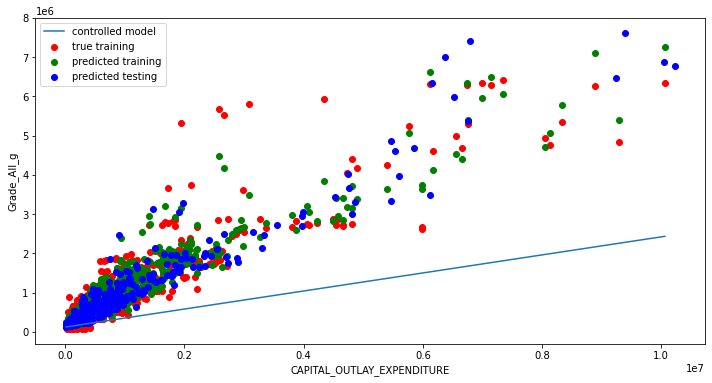

In [51]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "CAPITAL_OUTLAY_EXPENDITURE"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("Grade_All_g")

<h2> Summary </h2>

**Lasso linear model words will for this dataset**